Sentences embedings methods/models


Create Index of the methods using FAISS

-Flat
-IVF
-HNSW
-Hybraid systems
(IVF-PQ: cluster-based + quantized|HNSW-PQ: graph-based + quantized)

Use these Methods as well
-Query rewriter : Reduces the noise and adds context or fixes to get better results
-ReRankers : Re Ranks the results fetched to get the better results
-Knowlegde Graphs : structured reasoning about relationships
-Ragas : Checking how good the RAG models is

#Sentences embeding transformer


In [1]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

texts = ["Mumbai is a city in India", "Paris is the capital of France"]
embeddings = model.encode(texts)

# Compare similarity
import numpy as np
sim = np.dot(embeddings[0], embeddings[1]) / (np.linalg.norm(embeddings[0]) * np.linalg.norm(embeddings[1]))
print(sim)  # closer to 1 = more similar


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

0.06868333


In [2]:
embeddings

array([[-3.25203897e-03,  1.48887979e-02, -5.44104241e-02,
         7.21493587e-02, -2.35274788e-02,  3.35979536e-02,
         3.23077478e-02, -1.27466088e-02, -2.70640757e-02,
         1.79148372e-02,  9.87290312e-03, -9.30870101e-02,
        -1.99161395e-02,  7.31079578e-02,  5.15665226e-02,
        -6.39451621e-03,  5.20976521e-02,  2.55144928e-02,
         9.19021368e-02, -8.12511146e-02, -3.62436846e-02,
         5.17183878e-02,  7.01278728e-03, -2.17694361e-02,
        -6.57470850e-03,  6.72124848e-02,  2.30620310e-04,
         5.60008995e-02, -5.48750274e-02,  6.23655021e-02,
         5.63048609e-02,  5.10991961e-02,  6.92672729e-02,
         3.80784348e-02, -2.51064077e-02, -2.23017372e-02,
        -2.93123914e-04,  5.38122915e-02,  8.92216042e-02,
        -1.13297977e-01, -1.54121751e-02, -1.81152523e-02,
        -4.55299392e-04, -8.28853156e-03,  1.88875315e-03,
        -2.11176295e-02, -3.91767034e-03,  1.01118349e-01,
         4.29180376e-02, -6.61949590e-02, -3.94220054e-0

In [5]:
embeddings.shape

(10, 384)

In [ ]:
lama index
embeding models
rerank

graph rag

ragas

#FAISS using bruteforce


In [6]:
# -------------------------------
# RAG / Vector Search Demo with FAISS
# -------------------------------

# Install dependencies if needed:
!pip install sentence-transformers faiss-cpu matplotlib scikit-learn

import numpy as np
from sentence_transformers import SentenceTransformer
import faiss
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# -------------------------------
# 1️⃣ Sample sentences
# -------------------------------
sentences = [
    "One Piece is a popular anime.",
    "Naruto is a famous anime too.",
    "Tokyo is the capital of Japan.",
    "I love eating pizza on weekends.",
    "Mount Fuji is a beautiful mountain.",
    "Demon Slayer is a newer anime series.",
    "Paris is known as the city of lights.",
    "Sushi is a traditional Japanese food.",
    "Attack on Titan is a thrilling anime.",
    "Delhi is the capital of India."
]

# -------------------------------
# 2️⃣ Create embeddings
# -------------------------------
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(sentences)

print("Embeddings shape:", embeddings.shape)  # (10, 384)

# -------------------------------
# 3️⃣ Build FAISS index (Flat)
# -------------------------------
d = embeddings.shape[1]  # dimension
index = faiss.IndexFlatL2(d)
index.add(np.array(embeddings))


Embeddings shape: (10, 384)



Query: anime
Top-k retrieved sentences:
1. One Piece is a popular anime. (Distance: 0.7989)
2. Attack on Titan is a thrilling anime. (Distance: 0.9054)
3. Naruto is a famous anime too. (Distance: 0.9191)
4. Demon Slayer is a newer anime series. (Distance: 1.0526)
5. Tokyo is the capital of Japan. (Distance: 1.3165)


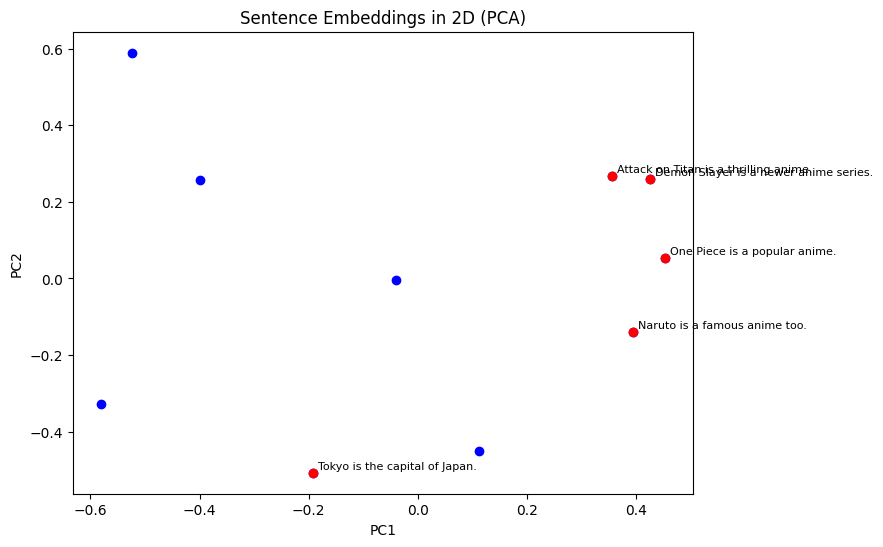

In [14]:
# -------------------------------
# 4️⃣ Query and retrieve top-k
# -------------------------------
query = "anime"
query_vec = model.encode([query])
k = 5

distances, indices = index.search(np.array(query_vec), k)
print("\nQuery:", query)
print("Top-k retrieved sentences:")
for i, idx in enumerate(indices[0]):
    print(f"{i+1}. {sentences[idx]} (Distance: {distances[0][i]:.4f})")

# -------------------------------
# 5️⃣ Visualize embeddings in 2D
# -------------------------------
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(emb_2d[:,0], emb_2d[:,1], color='blue')

# Highlight top-k retrieved points
for i, idx in enumerate(indices[0]):
    plt.scatter(emb_2d[idx,0], emb_2d[idx,1], color='red')
    plt.text(emb_2d[idx,0]+0.01, emb_2d[idx,1]+0.01, sentences[idx], fontsize=8)

plt.title("Sentence Embeddings in 2D (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


#FAISS Demo all

In [2]:
# Install dependencies if needed:
!pip install sentence-transformers faiss-cpu matplotlib scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.4/31.4 MB 62.3 MB/s eta 0:00:00



Flat Index Retrieval (time: 0.06 ms)
1. One Piece is a popular anime. (Distance: 0.8542)
2. Demon Slayer is a newer anime series. (Distance: 0.9010)
3. Attack on Titan is a thrilling anime. (Distance: 0.9161)

IVF Index Retrieval (time: 0.31 ms)
1. One Piece is a popular anime. (Distance: 0.8542)
2. Demon Slayer is a newer anime series. (Distance: 0.9010)
3. Attack on Titan is a thrilling anime. (Distance: 0.9161)

HNSW Index Retrieval (time: 0.05 ms)
1. One Piece is a popular anime. (Distance: 0.8542)
2. Demon Slayer is a newer anime series. (Distance: 0.9010)
3. Attack on Titan is a thrilling anime. (Distance: 0.9161)


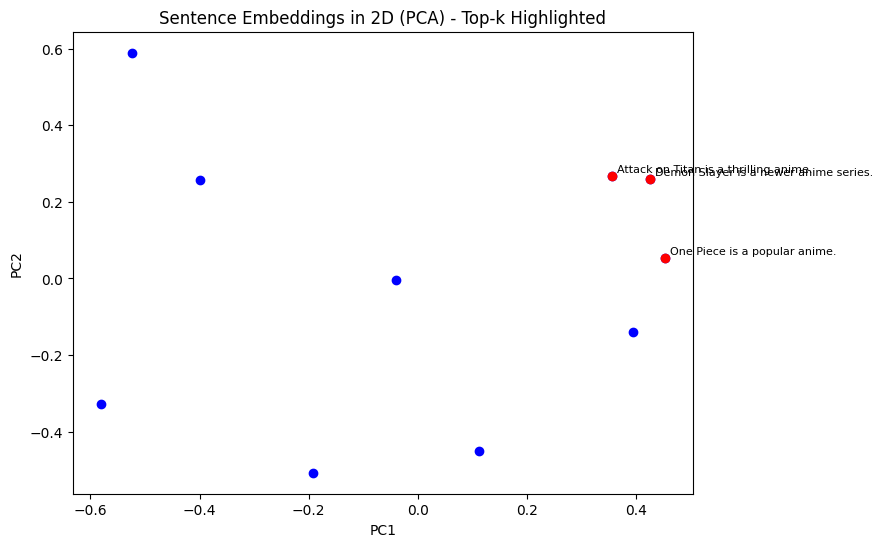

In [17]:
# -------------------------------
# Extended FAISS Demo: Flat, IVF, HNSW
# -------------------------------

import numpy as np
from sentence_transformers import SentenceTransformer
import faiss
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time

# -------------------------------
# 1️⃣ Sample sentences
# -------------------------------
sentences = [
    "One Piece is a popular anime.",
    "Naruto is a famous anime too.",
    "Tokyo is the capital of Japan.",
    "I love eating pizza on weekends.",
    "Mount Fuji is a beautiful mountain.",
    "Demon Slayer is a newer anime series.",
    "Paris is known as the city of lights.",
    "Sushi is a traditional Japanese food.",
    "Attack on Titan is a thrilling anime.",
    "Delhi is the capital of India.",

]

# -------------------------------
# 2️⃣ Create embeddings
# -------------------------------
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
d = embeddings.shape[1]  # dimension

# -------------------------------
# 3️⃣ Build FAISS indexes
# -------------------------------

# --- Flat index ---
index_flat = faiss.IndexFlatL2(d)
index_flat.add(np.array(embeddings))

# --- IVF index (clustered search) ---
nlist = 2  # number of clusters (for small dataset)
quantizer = faiss.IndexFlatL2(d)
index_ivf = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
index_ivf.train(np.array(embeddings))  # training clusters
index_ivf.add(np.array(embeddings))

# --- HNSW index ---
index_hnsw = faiss.IndexHNSWFlat(d, 5)  # M=5 neighbors per node
index_hnsw.add(np.array(embeddings))

# -------------------------------
# 4️⃣ Query and compare retrieval
# -------------------------------
query = "anime series"
query_vec = model.encode([query])
k = 3

indexes = {"Flat": index_flat, "IVF": index_ivf, "HNSW": index_hnsw}

for name, idx in indexes.items():
    start = time.time()
    distances, indices = idx.search(np.array(query_vec), k)
    end = time.time()

    print(f"\n{name} Index Retrieval (time: {(end-start)*1000:.2f} ms)")
    for i, idx_doc in enumerate(indices[0]):
        print(f"{i+1}. {sentences[idx_doc]} (Distance: {distances[0][i]:.4f})")

# -------------------------------
# 5️⃣ Visualize embeddings in 2D
# -------------------------------
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

plt.figure(figsize=(8,6))
plt.scatter(emb_2d[:,0], emb_2d[:,1], color='blue')

# Highlight Flat index top-k points (you can change to visualize other indexes)
distances, indices = index_flat.search(np.array(query_vec), k)
for i, idx_doc in enumerate(indices[0]):
    plt.scatter(emb_2d[idx_doc,0], emb_2d[idx_doc,1], color='red')
    plt.text(emb_2d[idx_doc,0]+0.01, emb_2d[idx_doc,1]+0.01, sentences[idx_doc], fontsize=8)

plt.title("Sentence Embeddings in 2D (PCA) - Top-k Highlighted")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [18]:
# -------------------------------
# Large Dataset FAISS Demo
# -------------------------------

import numpy as np
from sentence_transformers import SentenceTransformer
import faiss
import time

# -------------------------------
# 1️⃣ Generate a large dataset
# -------------------------------
base_sentences = [
    "One Piece is a popular anime.",
    "Naruto is a famous anime too.",
    "Demon Slayer is a newer anime series.",
    "Tokyo is the capital of Japan.",
    "Delhi is the capital of India."
]

# Repeat & shuffle to simulate 10,000 sentences
sentences = base_sentences * 2000  # 5*2000 = 10,000 sentences

# -------------------------------
# 2️⃣ Create embeddings
# -------------------------------
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(sentences, batch_size=64, show_progress_bar=True)
d = embeddings.shape[1]

print("Embeddings shape:", embeddings.shape)  # (10000, 384)

# -------------------------------
# 3️⃣ Build FAISS indexes
# -------------------------------

# Flat index
index_flat = faiss.IndexFlatL2(d)
index_flat.add(np.array(embeddings, dtype=np.float32))

# IVF index
nlist = 100  # number of clusters
quantizer = faiss.IndexFlatL2(d)
index_ivf = faiss.IndexIVFFlat(quantizer, d, nlist, faiss.METRIC_L2)
index_ivf.train(np.array(embeddings, dtype=np.float32))
index_ivf.add(np.array(embeddings, dtype=np.float32))

# HNSW index
index_hnsw = faiss.IndexHNSWFlat(d, 32)  # 32 neighbors per node
index_hnsw.add(np.array(embeddings, dtype=np.float32))

# -------------------------------
# 4️⃣ Query and compare retrieval
# -------------------------------
query = "anime series"
query_vec = model.encode([query])

k = 5
indexes = {"Flat": index_flat, "IVF": index_ivf, "HNSW": index_hnsw}

for name, idx in indexes.items():
    start = time.time()
    distances, indices = idx.search(np.array(query_vec, dtype=np.float32), k)
    end = time.time()

    print(f"\n{name} Index Retrieval (time: {(end-start)*1000:.2f} ms)")
    for i, idx_doc in enumerate(indices[0]):
        print(f"{i+1}. {sentences[idx_doc]} (Distance: {distances[0][i]:.4f})")


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Embeddings shape: (10000, 384)

Flat Index Retrieval (time: 1.86 ms)
1. One Piece is a popular anime. (Distance: 0.8542)
2. One Piece is a popular anime. (Distance: 0.8542)
3. One Piece is a popular anime. (Distance: 0.8542)
4. One Piece is a popular anime. (Distance: 0.8542)
5. One Piece is a popular anime. (Distance: 0.8542)

IVF Index Retrieval (time: 0.40 ms)
1. Delhi is the capital of India. (Distance: 340282346638528859811704183484516925440.0000)
2. Delhi is the capital of India. (Distance: 340282346638528859811704183484516925440.0000)
3. Delhi is the capital of India. (Distance: 340282346638528859811704183484516925440.0000)
4. Delhi is the capital of India. (Distance: 340282346638528859811704183484516925440.0000)
5. Delhi is the capital of India. (Distance: 340282346638528859811704183484516925440.0000)

HNSW Index Retrieval (time: 0.12 ms)
1. Demon Slayer is a newer anime series. (Distance: 0.9010)
2. Demon Slayer is a newer anime series. (Distance: 0.9010)
3. Demon Slayer is a 

In [3]:
# -------------------------------
# FAISS Demo: Flat vs IVF-PQ vs HNSW-PQ
# -------------------------------

import numpy as np
from sentence_transformers import SentenceTransformer
import faiss
import time

# -------------------------------
# 1️⃣ Generate dataset
# -------------------------------
base_sentences = [
    "One Piece is a popular anime.",
    "Naruto is a famous anime too.",
    "Demon Slayer is a newer anime series.",
    "Tokyo is the capital of Japan.",
    "Delhi is the capital of India.",
    "Paris is the city of lights.",
    "Sushi is traditional Japanese food.",
    "Mount Fuji is a beautiful mountain."
]

# Repeat to simulate 10,000 sentences
sentences = base_sentences * 1250  # 8*1250=10,000

# -------------------------------
# 2️⃣ Create embeddings
# -------------------------------
model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = model.encode(sentences, batch_size=64, show_progress_bar=True)
embeddings = embeddings.astype(np.float32)
d = embeddings.shape[1]

print("Embeddings shape:", embeddings.shape)

# -------------------------------
# 3️⃣ Flat index (baseline)
# -------------------------------
index_flat = faiss.IndexFlatL2(d)
index_flat.add(embeddings)
print(f"\nFlat index built with {index_flat.ntotal} vectors")

# -------------------------------
# 4️⃣ IVF-PQ index
# -------------------------------
nlist = 100  # clusters
m = 16       # sub-vectors for PQ
nbits = 8    # bits per sub-vector

quantizer = faiss.IndexFlatL2(d)
index_ivfpq = faiss.IndexIVFPQ(quantizer, d, nlist, m, nbits)

start = time.time()
index_ivfpq.train(embeddings)   # training required
index_ivfpq.add(embeddings)
end = time.time()

print(f"\nIVF-PQ index built in {(end-start):.2f} seconds")
print(f"IVF-PQ memory usage: {index_ivfpq.ntotal * d * 4 / (1024**2):.2f} MB (approx)")

# -------------------------------
# 5️⃣ HNSW-PQ index
# -------------------------------
M = 32  # neighbors
index_hnswpq = faiss.IndexHNSWPQ(d, M, m, nbits)

start = time.time()
index_hnswpq.train(embeddings)   # ✅ training required for PQ
index_hnswpq.add(embeddings)
end = time.time()

print(f"\nHNSW-PQ index built in {(end-start):.2f} seconds")
print(f"HNSW-PQ memory usage: {index_hnswpq.ntotal * d * 4 / (1024**2):.2f} MB (approx)")

# -------------------------------
# 6️⃣ Query top-k retrieval
# -------------------------------
query = "anime series"
query_vec = model.encode([query], convert_to_numpy=True).astype(np.float32)
k = 5

indexes = {"Flat": index_flat, "IVF-PQ": index_ivfpq, "HNSW-PQ": index_hnswpq}

for name, idx in indexes.items():
    start = time.time()
    distances, indices = idx.search(query_vec, k)
    end = time.time()

    print(f"\n{name} top-{k} retrieval (time: {(end-start)*1000:.2f} ms)")
    for i, idx_doc in enumerate(indices[0]):
        print(f"{i+1}. {sentences[idx_doc]} (Distance: {distances[0][i]:.4f})")


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/157 [00:00<?, ?it/s]

Embeddings shape: (10000, 384)

Flat index built with 10000 vectors

IVF-PQ index built in 3.96 seconds
IVF-PQ memory usage: 14.65 MB (approx)

HNSW-PQ index built in 8.34 seconds
HNSW-PQ memory usage: 14.65 MB (approx)

Flat top-5 retrieval (time: 1.68 ms)
1. One Piece is a popular anime. (Distance: 0.8542)
2. One Piece is a popular anime. (Distance: 0.8542)
3. One Piece is a popular anime. (Distance: 0.8542)
4. One Piece is a popular anime. (Distance: 0.8542)
5. One Piece is a popular anime. (Distance: 0.8542)

IVF-PQ top-5 retrieval (time: 0.14 ms)
1. Mount Fuji is a beautiful mountain. (Distance: 340282346638528859811704183484516925440.0000)
2. Mount Fuji is a beautiful mountain. (Distance: 340282346638528859811704183484516925440.0000)
3. Mount Fuji is a beautiful mountain. (Distance: 340282346638528859811704183484516925440.0000)
4. Mount Fuji is a beautiful mountain. (Distance: 340282346638528859811704183484516925440.0000)
5. Mount Fuji is a beautiful mountain. (Distance: 34028234